CODSOFT DATA SCIENCE INTERNSHIP

NOV BATCH A18

TASK 2

BY HARRENI.R

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [ ]:
df = pd.read_csv('/content/movieratingdata.csv', encoding='latin-1')


In [ ]:
selected_features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Rating']


In [ ]:
df_selected = df[selected_features]


In [ ]:
df_selected['Rating'].fillna(df_selected['Rating'].mean(), inplace=True)


<ipython-input-5-6b914f45badb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Rating'].fillna(df_selected['Rating'].mean(), inplace=True)


In [ ]:
X = df_selected.drop('Rating', axis=1)
y = df_selected['Rating']



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'])
    ])

In [ ]:
X_combined = pd.concat([X_train, X_test])

In [ ]:
preprocessor.fit(X_combined)

ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                 ['Genre', 'Director', 'Actor 1', 'Actor 2',
                                  'Actor 3'])])

In [ ]:
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train_transformed, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test_transformed)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 3.470963193501184
R-squared: -2.606280302532805


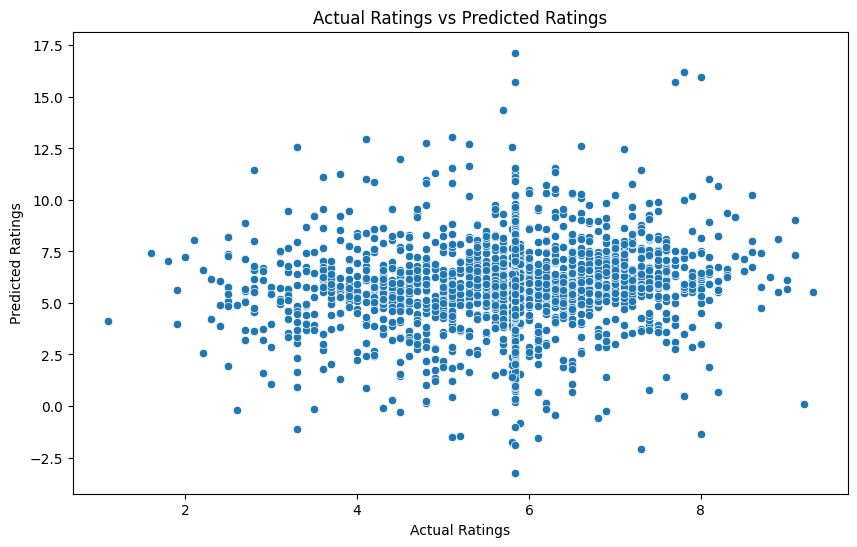

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual Ratings vs Predicted Ratings')
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Rating', data=df, palette='viridis')
plt.title('Distribution of Ratings in IMDb India Movies')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

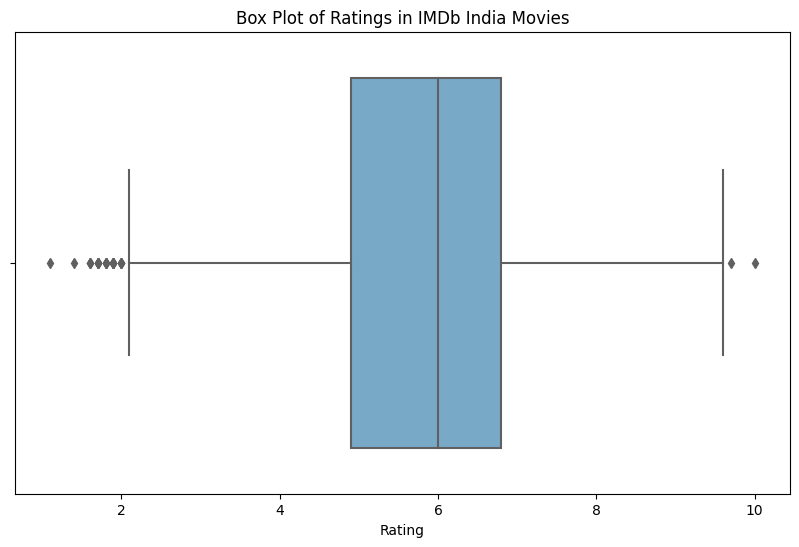

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rating', data=df, palette='Blues')
plt.title('Box Plot of Ratings in IMDb India Movies')
plt.xlabel('Rating')
plt.show()